In [1]:
import cv2
import numpy as np
from keras.models import load_model
import time
import matplotlib.pyplot as plt

In [2]:
# Load the pre-trained model
model = load_model("micro_expression_model.keras")


c:\python 3.11\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 36 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [3]:
# Initialize OpenCV face cascade classifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
# Define emotion labels
emotion_labels = ['Positive', 'Negative', 'Surprise']

In [5]:
# Define video writer object
frame_width = int(640)
frame_height = int(480)
out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (frame_width, frame_height))

In [6]:
# Read video file
video_path = "D:/Machine Learning/MFER/Video/A.mp4"
cap = cv2.VideoCapture(video_path)

In [7]:
# Initialize variables to track expression changes
prev_emotion = None
start_time = None

In [8]:
# Initialize variables for emotion timeline
timeline_start = time.time()
timeline_data = []

In [9]:
# Initialize variables for graphical representation
x_values = []
y_values = []
colors = {'Positive': 'green', 'Negative': 'red', 'Surprise': 'blue'}

In [10]:
# Loop to capture frames from the video file
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Process each face in the frame
    for x, y, w, h in faces:
        roi_gray = gray[y:y + h, x:x + w]  # Region of interest (ROI) in grayscale
        roi_color = frame[y:y + h, x:x + w]  # Region of interest (ROI) in color

        # Resize and normalize the ROI
        resized_roi = cv2.resize(roi_color, (48, 48))
        normalized_roi = resized_roi / 255.0

        # Perform prediction
        predictions = model.predict(np.expand_dims(normalized_roi, axis=0))
        emotion_label = emotion_labels[np.argmax(predictions)]

        # If expression changes, update variables
        if emotion_label != prev_emotion:
            if start_time is not None:
                end_time = time.time()
                duration = end_time - start_time
                timeline_data.append((start_time - timeline_start, end_time - timeline_start, prev_emotion))
                start_time = None
            else:
                start_time = time.time()
            prev_emotion = emotion_label

        # Draw rectangle around the face and label the emotion
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the frame
    cv2.imshow('Processed Video', frame)

    # Write frame to output video
    out.write(frame)

    # Append data for graphical representation
    x_values.append(time.time())
    y_values.append(emotion_label)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer objects
cap.release()
out.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

In [11]:
# Save the emotion timeline data to a text file
with open('emotion_timeline.txt', 'w') as f:
    for start, end, emotion in timeline_data:
        f.write(f"{start}: {emotion}\n")
        f.write(f"{end}: {emotion}\n")

In [12]:
# Display the content of the emotion_timeline.txt file
print("Content of emotion_timeline.txt:")
with open('emotion_timeline.txt', 'r') as f:
    print(f.read())

Content of emotion_timeline.txt:
0.6112215518951416: Surprise
12.45657992362976: Surprise
12.6559419631958: Surprise
12.885084867477417: Surprise
13.06612229347229: Surprise
20.156020879745483: Surprise
20.21705722808838: Surprise
21.327553749084473: Surprise
22.808385610580444: Surprise
22.97230076789856: Surprise
23.32460379600525: Surprise
23.49150514602661: Surprise
28.890187978744507: Surprise
29.034706592559814: Surprise
29.64875102043152: Surprise
30.289552450180054: Surprise
30.657145977020264: Positive
30.803110122680664: Positive
30.882233381271362: Surprise
31.033185720443726: Surprise
31.107861518859863: Surprise
31.252490758895874: Surprise
31.333541870117188: Surprise
31.479055404663086: Surprise
31.61811113357544: Surprise
31.780086755752563: Surprise
31.857853889465332: Surprise
32.00545072555542: Surprise
32.08144688606262: Surprise
32.254740715026855: Surprise
32.810166358947754: Surprise
32.968883752822876: Surprise
33.208402156829834: Surprise
33.35953760147095: Sur

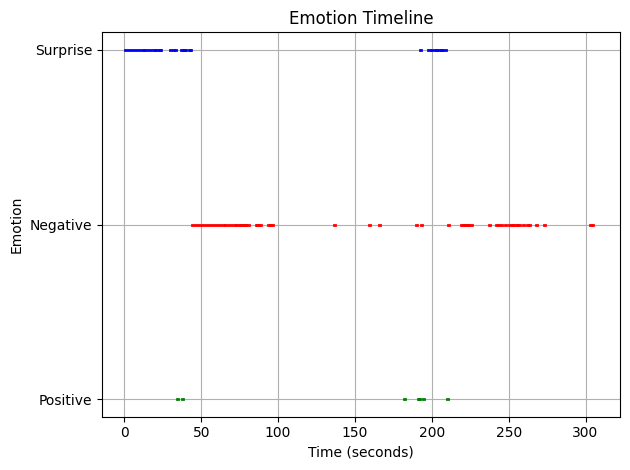

In [13]:
# Save the emotion timeline as an image
plt.figure()
for start, end, emotion in timeline_data:
    plt.plot([start, end], [emotion_labels.index(emotion), emotion_labels.index(emotion)], color=colors[emotion], linewidth=2)
plt.xlabel('Time (seconds)')
plt.ylabel('Emotion')
plt.title('Emotion Timeline')
plt.yticks(np.arange(3), emotion_labels)
plt.grid(True)
plt.tight_layout()
plt.savefig('emotion_timeline.png')
plt.show()

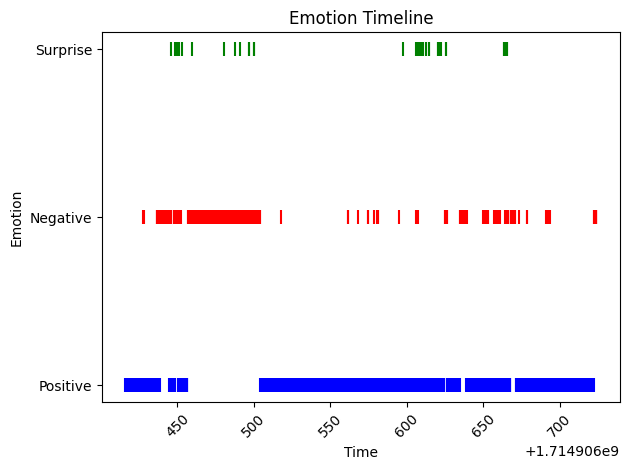

In [14]:
# Save the graphical representation as an image
plt.scatter(x_values, y_values, c=[colors[val] for val in y_values], marker='|', s=100)
plt.xlabel('Time')
plt.ylabel('Emotion')
plt.title('Emotion Timeline')
plt.xticks(rotation=45)
plt.yticks(np.arange(3), emotion_labels)
plt.tight_layout()
plt.savefig('graphical_representation.png')
plt.show()